<a href="https://colab.research.google.com/github/ShrutiChrist/Deep-Learning/blob/main/2348545_DL(lab2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multilayer Perceptrons

### Importing the dataset


In [10]:
import pandas as pd
data=pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### checking for null values

In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

### Standardizing

In [12]:
from sklearn.preprocessing import StandardScaler
x=data.drop(columns=['Class','Time'])
y=data['Class']
sc=StandardScaler()
x=sc.fit_transform(x)

### Splitting the dataset

In [14]:
import numpy as np

# Remove rows with NaN values in y
valid_indices = ~np.isnan(y)
x_valid = x[valid_indices]
y_valid = y[valid_indices]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_valid, y_valid, test_size=0.2, stratify=y_valid)


### Importing necessary libraries

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense

### creating a hidden layer consisting 15 neurons with relu activation and sigmoid activation for output

In [16]:
model = Sequential([
    Dense(input_dim=29,units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

### Compiling using Adam optimizer

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Creating 10 epocs with batch of 1000

In [18]:
model.fit(x_train, y_train, epochs=10,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 1s 32ms/step - loss: 0.7971 - accuracy: 0.4172 - val_loss: 0.7415 - val_accuracy: 0.4812
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.5406 - val_loss: 0.6471 - val_accuracy: 0.6131
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6054 - accuracy: 0.6734 - val_loss: 0.5671 - val_accuracy: 0.7393
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5307 - accuracy: 0.7847 - val_loss: 0.4997 - val_accuracy: 0.8251
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4677 - accuracy: 0.8674 - val_loss: 0.4422 - val_accuracy: 0.8898
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4147 - accuracy: 0.9204 - val_loss: 0.3929 - val_accuracy: 0.9347
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3689 - accuracy: 0.9523 - val_loss: 0.3505 - val_accuracy: 0.9585
Epoch 8/10
13/13 [=

### creating a hidden layer consisting 15 neurons with hyperbolic tangent activation and sigmoid activation for output

In [19]:
model1 = Sequential([
    Dense(input_dim=29,units=15, activation='tanh'),
    Dense(units=1, activation='sigmoid')
])

### Compiling using SGD optimizer

In [20]:
model1.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Creating 10 epocs with batch of 1000

In [21]:
model1.fit(x_train, y_train, epochs=10,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 1s 16ms/step - loss: 0.7657 - accuracy: 0.5253 - val_loss: 0.7393 - val_accuracy: 0.5440
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.7101 - accuracy: 0.5644 - val_loss: 0.6867 - val_accuracy: 0.5867
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.6051 - val_loss: 0.6395 - val_accuracy: 0.6225
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.6431 - val_loss: 0.5969 - val_accuracy: 0.6677
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.6856 - val_loss: 0.5585 - val_accuracy: 0.7038
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5380 - accuracy: 0.7219 - val_loss: 0.5236 - val_accuracy: 0.7412
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5047 - accuracy: 0.7569 - val_loss: 0.4920 - val_accuracy: 0.7817
Epoch 8/10
13/13 [=

Since Relu has performed better we will go ahead with that model

### Predicting values using testing test

In [22]:
import numpy as np
Y_PREC = np.where(1 , model.predict(x_test) > 0.5, 0)

125/125 [==============================] - 0s 1ms/step


### Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Y_PREC)

array([[3948,   15],
       [  12,    5]])

### Precision, Recall and f1-score

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_PREC))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3963
         1.0       0.25      0.29      0.27        17

    accuracy                           0.99      3980
   macro avg       0.62      0.65      0.63      3980
weighted avg       0.99      0.99      0.99      3980



### Precision Recall Curve

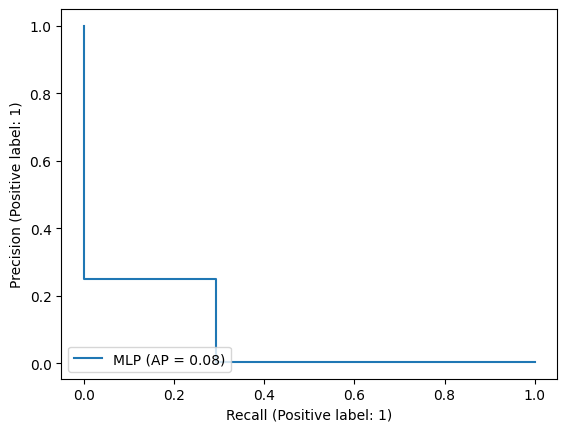

In [25]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(y_test, Y_PREC, name="MLP")